# Draft analysis 

---

Group name: Group F (Ji Soo Ha & Alexander Hörmann)

---


## Introduction

### Intro

The project group (herein, "we") decided to investigate the subject of **labor productivity**. **Productivity** is commonly defined as a ratio between the volume of output and the volume of inputs. In other words, it measures how efficiently production inputs, such as **labour**, is used in an economy to produce a given level of output. Hence it is a key source for economic growth and affects our future worklife.

### Motivation

The project idea is based on the following CNN news article regarding working hours in south korea https://edition.cnn.com/2018/07/02/health/south-korea-work-hours/index.html

Our research question is motivated by the following literature:
- OECD (2022), Labour productivity and utilisation (indicator). doi: 10.1787/02c02f63-en (Accessed on 11 December 2022) https://www.oecd-ilibrary.org/sites/3d9f648d-en/index.html?itemId=/content/component/3d9f648d-en
- Pencavel, J. (2016), Recovery from Work and the Productivity of Working Hours. Economica, 83: 545-563. https://doi.org/10.1111/ecca.12206
- Messenger, J. "Working time and the future of work." ILO future of work research paper series 6.8 (2018): 33-37. http://www.ilo.int/wcmsp5/groups/public/---dgreports/---cabinet/documents/publication/wcms_649907.pdf


### Research Questions
1) Does the longer average annual working hours increase labor productivity?
2) What is the most related factor in improving labor productivity?
  - Annual working hours per worker
  - GDP of the country
  - Gini coefficient of country
  - Life satisfaction level of worker
  - Amount of health expenditure of worker

### Hypotheses
1) Labor productivity declines in case of Longer average annual working hours.
2) Life satisfaction level of country is the most related factor (regarding factors listed above) in improving labor productivity.

## Setup

In [108]:
import numpy as np
import pandas as pd
import altair as alt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

## Data

## Import data

In [109]:
df = pd.read_csv('C:/Users/ji_so/Desktop/HA/UNI/HdM/Applied Statistics/Projekt/Second Projekt Idea/Labor_Productivity_Analysis_final.csv',sep=';',decimal=',')

### Data structure

In [110]:
df

,Continent,Country,Code,Year,Average annual working hours per worker,GDP per capita,Population,gini_coefficient,Life satisfaction,Productivity,Current health expenditure per capita
0,Americas,Argentina,ARG,2017,1691.5363,23272.18,44054616,NaN,6.085561,30.955460,2470.11
1,Oceania,Australia,AUS,2017,1731.4943,52536.19,24590336,NaN,7.233995,60.341679,4715.83
2,Europe,Austria,AUT,2017,1613.0519,51954.28,8797497,0.297376,7.195361,64.780170,5641.18
3,Asia,Bangladesh,BGD,2017,2232.3542,4112.70,161793968,NaN,5.114217,4.307637,101.18
4,Europe,Belgium,BEL,2017,1544.2690,45150.20,11384491,0.273880,6.772138,68.516521,5450.48
...,...,...,...,...,...,...,...,...,...,...,...
61,Asia,Turkey,TUR,2017,1832.0000,26611.18,82089824,0.414057,4.872074,41.799203,1166.73
62,Europe,United Kingdom,GBR,2017,1670.2728,44093.93,66064808,0.351488,7.157151,54.676921,4515.59
63,Americas,United States,USA,2017,1757.2255,60116.57,329791232,0.411806,6.943701,71.638571,10103.09
64,Americas,Uruguay,URY,2017,1552.3470,20615.56,3422205,0.394645,6.600337,28.295846,2029.89


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Continent                                66 non-null     object 
 1   Country                                  66 non-null     object 
 2   Code                                     66 non-null     object 
 3   Year                                     66 non-null     int64  
 4   Average annual working hours per worker  66 non-null     float64
 5   GDP per capita                           66 non-null     float64
 6   Population                               66 non-null     int64  
 7   gini_coefficient                         48 non-null     float64
 8   Life satisfaction                        65 non-null     float64
 9   Productivity                             65 non-null     float64
 10  Current health expenditure per capita    64 non-null

### Data corrections

In [112]:
# variable Continent is categorical
df['Continent'] = df['Continent'].astype('category')

In [113]:
# variable Country is categorical
df['Country'] = df['Country'].astype('category')

In [114]:
# Check for missing values for each variable.
print(df.isnull().sum())

Continent                                   0
Country                                     0
Code                                        0
Year                                        0
Average annual working hours per worker     0
GDP per capita                              0
Population                                  0
gini_coefficient                           18
Life satisfaction                           1
Productivity                                1
Current health expenditure per capita       2
dtype: int64


In [115]:
# Drop missing values
df.dropna(inplace=True)

In [116]:
print(df.isnull().sum())

Continent                                  0
Country                                    0
Code                                       0
Year                                       0
Average annual working hours per worker    0
GDP per capita                             0
Population                                 0
gini_coefficient                           0
Life satisfaction                          0
Productivity                               0
Current health expenditure per capita      0
dtype: int64


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 2 to 64
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Continent                                47 non-null     category
 1   Country                                  47 non-null     category
 2   Code                                     47 non-null     object  
 3   Year                                     47 non-null     int64   
 4   Average annual working hours per worker  47 non-null     float64 
 5   GDP per capita                           47 non-null     float64 
 6   Population                               47 non-null     int64   
 7   gini_coefficient                         47 non-null     float64 
 8   Life satisfaction                        47 non-null     float64 
 9   Productivity                             47 non-null     float64 
 10  Current health expenditure per capita   

## Evaluation of our first hypothesis
- Labor productivity declines in case of Longer average annual working hours.

### Single linear regression model


### Variable lists

In [118]:
# define outcome variable as y_label
y_label_H1 = 'Productivity'

# select features
X_H1 = df[["Average annual working hours per worker"]]

# create response
y_H1 = df[y_label_H1]

### Data Splitting

In [119]:
X_train_H1, X_test_H1, y_train_H1, y_test_H1 = train_test_split(X_H1, y_H1, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=42)

In [120]:
X_train_H1.shape, y_train_H1.shape

((37, 1), (37,))

In [121]:
X_train_H1.head(2)

,Average annual working hours per worker
12,2212.3835
6,1643.5475


In [122]:
X_test_H1.shape, y_test_H1.shape

((10, 1), (10,))

In [123]:
df_train_H1 = pd.DataFrame(X_train_H1.copy())
df_train_H1 = df_train_H1.join(pd.DataFrame(y_train_H1))

In [124]:
df_train_H1.head(2)

,Average annual working hours per worker,Productivity
12,2212.3835,18.728041
6,1643.5475,25.392122


### Analysis

### Descriptive statistics

In [125]:
df_train_H1.describe().T

,count,mean,std,min,25%,50%,75%,max
Average annual working hours per worker,37.0,1804.150616,256.349355,1353.886800,1613.051900,1783.520600,1997.74800,2437.863300
Productivity,37.0,42.669195,26.068821,4.735484,25.392122,34.622095,64.78017,109.488306


### Exploratory data analysis

In [126]:
# Visualize the data
alt.Chart(df_train_H1).mark_circle(size=100).encode(
    x='Average annual working hours per worker:Q',
    y='Productivity:Q',
).interactive()

c:\Users\ji_so\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

### Simple regression model

In [127]:
from sklearn.neighbors import KNeighborsRegressor

reg_H1 = LinearRegression()
reg2_H1 = KNeighborsRegressor(n_neighbors=3)

### Training & Validation

In [128]:
# cross-validation with 5 folds
scores_H1 = cross_val_score(reg_H1, X_train_H1, y_train_H1, cv=5, scoring='neg_mean_squared_error') *-1
scores2_H1 = cross_val_score(reg2_H1, X_train_H1, y_train_H1, cv=5, scoring='neg_mean_squared_error') *-1

In [129]:
# store cross-validation scores
df_scores_H1 = pd.DataFrame({"lr": scores_H1, 
                          "knn": scores2_H1})

# reset index to match the number of folds
df_scores_H1.index += 1

# print dataframe
df_scores_H1.style.background_gradient(cmap='Blues')

,lr,knn
1,148.850445,181.016072
2,279.624821,195.118234
3,123.071267,248.821085
4,736.257869,787.521593
5,291.053135,360.756133


In [130]:
alt.Chart(df_scores_H1.reset_index()).mark_line(
     point=alt.OverlayMarkDef()
).encode(
    x=alt.X("index", bin=False, title="Fold", axis=alt.Axis(tickCount=5)),
    y=alt.Y(
        alt.repeat("layer"), aggregate="mean", title="Mean squared error (MSE)"
    ),
    color=alt.datum(alt.repeat("layer")),
).repeat(layer=["lr", "knn"])

c:\Users\ji_so\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.RepeatChart(...)

In [131]:
df_scores_H1.describe().T

,count,mean,std,min,25%,50%,75%,max
lr,5.0,315.771508,246.841237,123.071267,148.850445,279.624821,291.053135,736.257869
knn,5.0,354.646623,252.098188,181.016072,195.118234,248.821085,360.756133,787.521593


### Final Training

In [132]:
# Fit the model
reg_H1.fit(X_train_H1, y_train_H1)

LinearRegression()

In [133]:
print(f' Intercept: {reg_H1.intercept_:.3} \n Slope: {reg_H1.coef_[0]:.5f}')

 Intercept: 1.8e+02 
 Slope: -0.07592


In [134]:
# Prediction for our test data
y_pred_H1 = reg_H1.predict(X_test_H1)

# Mean squared error
mean_squared_error(y_test_H1, y_pred_H1)

182.9702740581808

## Evaluation of our first & second hypothese with using various models
- Labor productivity declines in case of Longer average annual working hours.
- Life satisfaction level of country is the most related factor (regarding all existing factors) in improving labor productivity.

### Multiple linear regression

### Variable lists

In [135]:
# define outcome variable as y_label
y_label = 'Productivity'

# select features
features = ["Average annual working hours per worker", 
            "GDP per capita",
            "Population",
            "gini_coefficient",
            "Life satisfaction",
            "Current health expenditure per capita"
            ]


# create feature data
X = df[features]

# create response
y = df[y_label]

### Data splitting

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [137]:
X_train

,Average annual working hours per worker,GDP per capita,Population,gini_coefficient,Life satisfaction,Current health expenditure per capita
12,2212.3835,18127.81,4993849,0.483465,6.997619,1439.77
6,1643.5475,19579.83,7182430,0.403790,5.108438,1607.71
10,2174.3501,13854.23,1410275968,0.390758,5.144120,706.37
57,1609.2896,52032.67,10058191,0.287746,7.398093,5655.70
46,2028.4952,29047.82,38532816,0.302966,6.242094,1972.37
18,1856.6827,30981.60,1317550,0.303550,6.034641,2241.85
22,2016.8954,26477.58,10692230,0.343520,5.952157,2325.62
62,1670.2728,44093.93,66064808,0.351488,7.157151,4515.59
20,1514.1371,42818.76,64144092,0.316321,6.689644,5059.99
13,1834.9327,25359.70,4192468,0.303546,5.625744,1804.07


In [138]:
# data exploration set
df_train = pd.DataFrame(X_train.copy())
df_train = df_train.join(pd.DataFrame(y_train))

## Analysis

### Descriptive statistics

In [139]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Average annual working hours per worker,37.0,1.804151e+03,2.563494e+02,1353.886800,1.613052e+03,1.783521e+03,1.997748e+03,2.437863e+03
GDP per capita,37.0,3.400638e+04,1.951846e+04,4762.930000,1.957983e+04,3.043003e+04,4.515020e+04,8.680865e+04
Population,37.0,1.136884e+08,3.160795e+08,479507.000000,5.439418e+06,1.030753e+07,5.228834e+07,1.410276e+09
gini_coefficient,37.0,3.440071e-01,7.042963e-02,0.232378,2.973758e-01,3.163207e-01,3.878526e-01,5.333405e-01
Life satisfaction,37.0,6.413980e+00,9.534856e-01,3.248770,6.000260e+00,6.451149e+00,7.157151e+00,7.780348e+00
Current health expenditure per capita,37.0,3.240130e+03,2.383217e+03,181.530000,1.439770e+03,2.325620e+03,5.450480e+03,1.010309e+04
Productivity,37.0,4.266920e+01,2.606882e+01,4.735484,2.539212e+01,3.462210e+01,6.478017e+01,1.094883e+02


### Exploratory data analysis

In [140]:
alt.Chart(df_train).mark_bar().encode(
    alt.X(alt.repeat("column"), type="quantitative", bin=True),
    y='count()',
).properties(
    width=150,
    height=150
).repeat(
    column=['Productivity', 'Average annual working hours per worker', 'GDP per capita', 'Population','gini_coefficient','Life satisfaction','Current health expenditure per capita']
)

c:\Users\ji_so\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.RepeatChart(...)

In [141]:
alt.Chart(df_train).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
    width=150,
    height=150
).repeat(
    row=['Productivity', 'Average annual working hours per worker', 'GDP per capita', 'Population','gini_coefficient','Life satisfaction','Current health expenditure per capita'],
    column=['Productivity', 'Average annual working hours per worker', 'GDP per capita', 'Population','gini_coefficient','Life satisfaction','Current health expenditure per capita']
).interactive()

alt.RepeatChart(...)

### Relationships

In [142]:
# inspect correlation between outcome and possible predictors
corr = df_train.corr()
corr[y_label].sort_values(ascending=False)

Productivity                               1.000000
GDP per capita                             0.980352
Current health expenditure per capita      0.898485
Life satisfaction                          0.744095
Population                                -0.321787
gini_coefficient                          -0.496877
Average annual working hours per worker   -0.746524
Name: Productivity, dtype: float64

In [143]:
# take a look at all correlations
corr.style.background_gradient(cmap='Blues')

,Average annual working hours per worker,GDP per capita,Population,gini_coefficient,Life satisfaction,Current health expenditure per capita,Productivity
Average annual working hours per worker,1.000000,-0.671149,0.333927,0.358698,-0.644917,-0.686490,-0.746524
GDP per capita,-0.671149,1.000000,-0.309999,-0.457773,0.759601,0.908126,0.980352
Population,0.333927,-0.309999,1.000000,0.202878,-0.568573,-0.246294,-0.321787
gini_coefficient,0.358698,-0.457773,0.202878,1.000000,-0.219546,-0.360122,-0.496877
Life satisfaction,-0.644917,0.759601,-0.568573,-0.219546,1.000000,0.725361,0.744095
Current health expenditure per capita,-0.686490,0.908126,-0.246294,-0.360122,0.725361,1.000000,0.898485
Productivity,-0.746524,0.980352,-0.321787,-0.496877,0.744095,0.898485,1.000000


## Model - Multiple linear regression

### Select model

In [144]:
# Choose the linear regression model
reg = LinearRegression()

### Training and validation

In [145]:
# cross-validation with 5 folds
scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error') *-1

In [146]:
# store cross-validation scores
df_scores = pd.DataFrame({"lr": scores})

# reset index to match the number of folds
df_scores.index += 1

# print dataframe
df_scores.style.background_gradient(cmap='Blues')

,lr
1,24.994464
2,32.687938
3,37.529093
4,35.528422
5,5.505207


In [147]:
alt.Chart(df_scores.reset_index()).mark_line(
     point=alt.OverlayMarkDef()
).encode(
    x=alt.X("index", bin=False, title="Fold", axis=alt.Axis(tickCount=5)),
    y=alt.Y("lr", aggregate="mean", title="Mean squared error (MSE)")
)

c:\Users\ji_so\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [148]:
df_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
lr,5.0,27.249025,13.054565,5.505207,24.994464,32.687938,35.528422,37.529093


### Fit model

In [149]:
# Fit the model to the data
reg.fit(X_train, y_train)

LinearRegression()

In [150]:
# Intercept 
intercept = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient":[reg.intercept_]}
    )
intercept

,Name,Coefficient
0,Intercept,47.720948


In [151]:
# Slope coefficients
slope = pd.DataFrame({
    "Name": features,
    "Coefficient": reg.coef_}
)
slope

,Name,Coefficient
0,Average annual working hours per worker,-1.702993e-02
1,GDP per capita,1.183650e-03
2,Population,-1.094956e-09
3,gini_coefficient,-1.490838e+01
4,Life satisfaction,-1.450817e+00
5,Current health expenditure per capita,-6.252246e-06


In [152]:
# combine dataframes
table = pd.concat([intercept, slope], ignore_index=True, sort=False)

round(table, 5)

,Name,Coefficient
0,Intercept,47.72095
1,Average annual working hours per worker,-0.01703
2,GDP per capita,0.00118
3,Population,-0.00000
4,gini_coefficient,-14.90838
5,Life satisfaction,-1.45082
6,Current health expenditure per capita,-0.00001


In [153]:
# Make predictions on the data
y_pred = reg.predict(X)

In [154]:
mean_squared_error(y, y_pred).round(3)

35.599

### Evaluation on test set

In [155]:
# obtain predictions
y_pred = reg.predict(X_test)

In [156]:
# R squared
r2_score(y_test, y_pred).round(5)

0.67909

In [157]:
# MSE
mean_squared_error(y_test, y_pred).round(5)

113.79038

In [158]:
# RMSE
mean_squared_error(y_test, y_pred, squared=False).round(5)

10.66726

In [159]:
# MAE
mean_absolute_error(y_test, y_pred).round(5)

7.35264

## Model - Lasso regression model

### Create labels and features

In [160]:
dummies = pd.get_dummies(df[['Continent']])

In [161]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 2 to 64
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Continent_Africa    47 non-null     uint8
 1   Continent_Americas  47 non-null     uint8
 2   Continent_Asia      47 non-null     uint8
 3   Continent_Europe    47 non-null     uint8
 4   Continent_Oceania   47 non-null     uint8
dtypes: uint8(5)
memory usage: 611.0 bytes


In [162]:
print(dummies.head())

   Continent_Africa  Continent_Americas  Continent_Asia  Continent_Europe  \
2                 0                   0               0                 1   
4                 0                   0               0                 1   
5                 0                   1               0                 0   
6                 0                   0               0                 1   
8                 0                   1               0                 0   

   Continent_Oceania  
2                  0  
4                  0  
5                  0  
6                  0  
8                  0  


In [163]:
y_LR = df['Productivity']

In [164]:
X_numerical = df.drop(['Productivity', 'Continent', 'Country', 'Code', 'Year'], axis=1).astype('float64')

In [165]:
list_numerical = X_numerical.columns
list_numerical

Index(['Average annual working hours per worker', 'GDP per capita',
       'Population', 'gini_coefficient', 'Life satisfaction',
       'Current health expenditure per capita'],
      dtype='object')

In [166]:
# Create all features
X_LR = pd.concat([X_numerical, dummies[['Continent_Americas', 'Continent_Oceania', 'Continent_Europe', 'Continent_Asia', 'Continent_Africa']]], axis=1)
X_LR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 2 to 64
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Average annual working hours per worker  47 non-null     float64
 1   GDP per capita                           47 non-null     float64
 2   Population                               47 non-null     float64
 3   gini_coefficient                         47 non-null     float64
 4   Life satisfaction                        47 non-null     float64
 5   Current health expenditure per capita    47 non-null     float64
 6   Continent_Americas                       47 non-null     uint8  
 7   Continent_Oceania                        47 non-null     uint8  
 8   Continent_Europe                         47 non-null     uint8  
 9   Continent_Asia                           47 non-null     uint8  
 10  Continent_Africa                         47 non-null

### Split data

In [167]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_LR, y_LR, test_size=0.3, random_state=10)

In [168]:
X_train_LR.head()

,Average annual working hours per worker,GDP per capita,Population,gini_coefficient,Life satisfaction,Current health expenditure per capita,Continent_Americas,Continent_Oceania,Continent_Europe,Continent_Asia,Continent_Africa
27,2024.2870,10640.70,264498848.0,0.387853,5.346513,317.59,0,0,0,1,0
47,1863.1744,30430.03,10307528.0,0.338038,6.095473,3072.32,0,0,1,0,0
34,1518.8575,90597.55,596290.0,0.345157,7.404016,5980.64,0,0,1,0,0
24,1937.3325,26908.97,9788940.0,0.305841,6.000260,1988.70,0,0,1,0,0
42,1417.4723,69604.79,5277396.0,0.269873,7.442140,6630.84,0,0,1,0,0


### Standardization

In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train_LR[list_numerical]) 

X_train_LR[list_numerical] = scaler.transform(X_train_LR[list_numerical])
X_test_LR[list_numerical] = scaler.transform(X_test_LR[list_numerical])

In [170]:
X_train_LR

,Average annual working hours per worker,GDP per capita,Population,gini_coefficient,Life satisfaction,Current health expenditure per capita,Continent_Americas,Continent_Oceania,Continent_Europe,Continent_Asia,Continent_Africa
27,0.943645,-1.334215,4.356824,0.936206,-1.358227,-1.517961,0,0,0,1,0
47,0.307149,-0.323042,-0.414694,0.060374,-0.441545,-0.092208,0,0,1,0,0
34,-1.053118,2.751331,-0.596987,0.185540,1.160032,1.413038,0,0,1,0,0
24,0.600120,-0.502957,-0.424429,-0.505717,-0.558080,-0.653053,0,0,1,0,0
42,-1.453653,1.678666,-0.509116,-1.138104,1.206694,1.749559,0,0,1,0,0
4,-0.952727,0.429113,-0.394478,-1.067664,0.386652,1.138645,0,0,1,0,0
17,-0.332136,-1.294749,-0.294756,1.971393,-0.792010,-1.235650,1,0,0,0,0
46,0.960270,-0.393669,0.115133,-0.556272,-0.262090,-0.661504,0,0,1,0,0
60,1.580322,-1.026373,0.722676,0.539468,-0.531286,-1.335784,0,0,0,1,0
33,0.231466,-0.353559,-0.553660,0.673257,-0.479946,-0.555031,0,0,1,0,0


### Lasso regression

In [171]:
from sklearn.linear_model import Lasso

reg_LR = Lasso(alpha=1)
reg_LR.fit(X_train_LR, y_train_LR)

Lasso(alpha=1)

### Model evaluation

In [172]:
print('R squared training set', round(reg_LR.score(X_train_LR, y_train_LR)*100, 2))
print('R squared test set', round(reg_LR.score(X_test_LR, y_test_LR)*100, 2))

R squared training set 93.92
R squared test set 93.16


In [173]:
# MSE for the training and test set

from sklearn.metrics import mean_squared_error

# Training data
pred_train_LR = reg_LR.predict(X_train_LR)
mse_train_LR = mean_squared_error(y_train_LR, pred_train_LR)
print('MSE training set', round(mse_train_LR, 2))

# Test data
pred_LR = reg_LR.predict(X_test_LR)
mse_test_LR =mean_squared_error(y_test_LR, pred_LR)
print('MSE test set', round(mse_test_LR, 2))

MSE training set 37.05
MSE test set 36.68


### Role of alpha

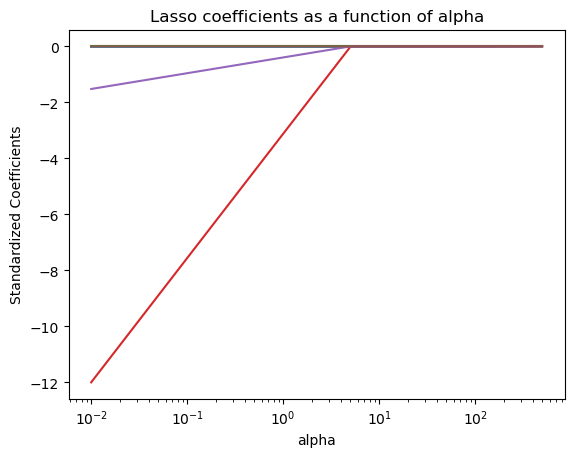

In [174]:
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

### Lasso with optimal alpha

### K-fold cross validation

In [175]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model_LR = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_LR.fit(X_train_LR, y_train_LR)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [176]:
model_LR.alpha_

0.8852697267339502

### Best model

In [177]:
# Set best alpha
lasso_best = Lasso(alpha=model_LR.alpha_)
lasso_best.fit(X_train_LR, y_train_LR)

Lasso(alpha=0.8852697267339502)

In [178]:
print(list(zip(lasso_best.coef_, X_LR)))

[(-2.2541626761141096, 'Average annual working hours per worker'), (15.314348935885674, 'GDP per capita'), (0.0, 'Population'), (-0.0782228672969546, 'gini_coefficient'), (-0.0, 'Life satisfaction'), (6.494898080826205, 'Current health expenditure per capita'), (-0.0, 'Continent_Americas'), (0.0, 'Continent_Oceania'), (0.0, 'Continent_Europe'), (0.0, 'Continent_Asia'), (0.0, 'Continent_Africa')]


### Model evaluation

In [179]:
print('R squared training set', round(lasso_best.score(X_train_LR, y_train_LR)*100, 2))
print('R squared test set', round(lasso_best.score(X_test_LR, y_test_LR)*100, 2))

R squared training set 93.97
R squared test set 93.36


In [180]:
mean_squared_error(y_test_LR, lasso_best.predict(X_test_LR))

35.60017339954395

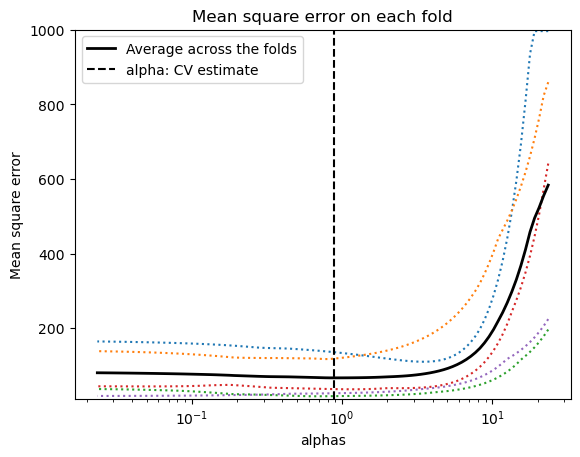

In [181]:
plt.semilogx(model_LR.alphas_, model_LR.mse_path_, ":")
plt.plot(
    model_LR.alphas_ ,
    model_LR.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model_LR.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 10, 1000
plt.ylim(ymin, ymax);

## Check for multicollinearity

C:\Users\ji_so\AppData\Local\Temp\ipykernel_27548\1835051848.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


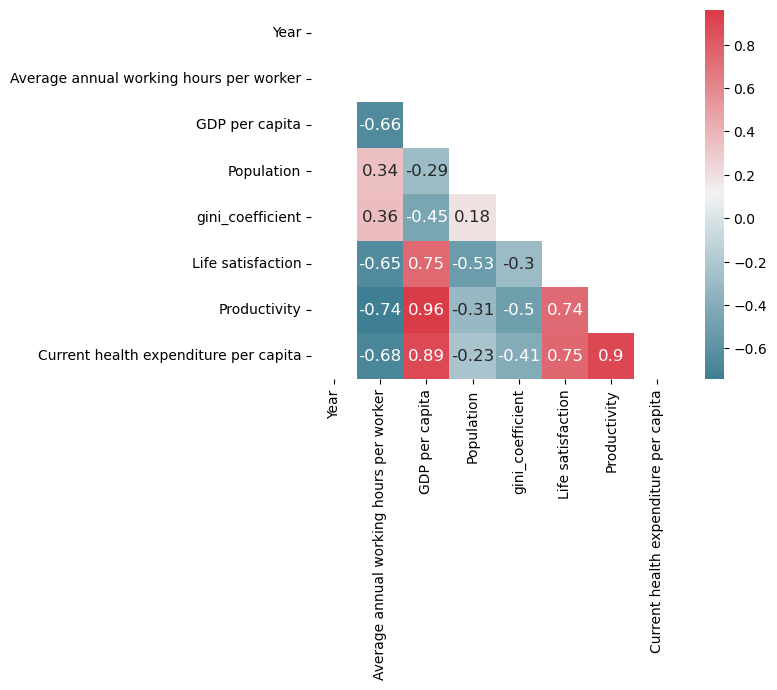

In [182]:
# Inspect correlation
# Calculate correlation using the default method ( "pearson")
corr = df.corr()
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,  square=True, annot_kws={"size": 12});

### Variance inflation factor (VIF)
- The smallest possible value for VIF is 1, which indicates the complete absence of collinearity.
- VIF value that exceeds 5 indicates a problematic amount of collinearity and the parameter estimates will have large standard errors because of this.

In [183]:
# choose features and add constant
features = add_constant(df[['Average annual working hours per worker', 'GDP per capita', 'Population','gini_coefficient','Life satisfaction','Current health expenditure per capita']])
# create empty DataFrame
vif = pd.DataFrame()
# calculate vif
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
# add feature names
vif["Feature"] = features.columns

vif.round(2)

,VIF Factor,Feature
0,344.87,const
1,2.11,Average annual working hours per worker
2,5.41,GDP per capita
3,1.56,Population
4,1.30,gini_coefficient
5,3.59,Life satisfaction
6,5.83,Current health expenditure per capita


We have a problematic amount of collinearity in our data.
- Current health expenditure per capita

### Save model



Save your model in the folder `models/`. Use a meaningful name and a timestamp.

## Conclusions